# This is a small project on analyzing the Time-series data on the famous Berkeley dataset for Global Temperatures By Country

## Importing basic libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

SInce I know there is a datetime column present in the dataset and it's at 1st index 

In [2]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", delimiter = ',', parse_dates = True, index_col = 0)

In [3]:
df.head(7)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland


In [4]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(1)
memory usage: 17.6+ MB


In [6]:
# renaming the index for better understanding
df.rename_axis(index = 'Date', inplace = True)

In [7]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [8]:
df_country = df.Country.unique()
len(df_country)

243

In [9]:
df_country

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

No need of the Uncertainty column in our analysis, hence dropping it

In [10]:
df = df.drop('AverageTemperatureUncertainty', axis = 1)

In [11]:
df.head(7)

,AverageTemperature,Country
Date,,
1743-11-01,4.384,Åland
1743-12-01,NaN,Åland
1744-01-01,NaN,Åland
1744-02-01,NaN,Åland
1744-03-01,NaN,Åland
1744-04-01,1.530,Åland
1744-05-01,6.702,Åland


Doing the analysis on United States

In [12]:
usa = df[df['Country'] == 'United States']

In [13]:
usa.head()

,AverageTemperature,Country
Date,,
1768-09-01,15.420,United States
1768-10-01,8.162,United States
1768-11-01,1.591,United States
1768-12-01,-2.882,United States
1769-01-01,-3.952,United States


In [14]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2941 entries, 1768-09-01 to 2013-09-01
Data columns (total 2 columns):
AverageTemperature    2482 non-null float64
Country               2941 non-null object
dtypes: float64(1), object(1)
memory usage: 68.9+ KB


No need of the column 'Country' now, since we know it's 'United States'

In [15]:
usa = usa.drop('Country', axis = 1)

In [16]:
usa.head(10)

,AverageTemperature
Date,
1768-09-01,15.420
1768-10-01,8.162
1768-11-01,1.591
1768-12-01,-2.882
1769-01-01,-3.952
1769-02-01,-2.684
1769-03-01,1.828
1769-04-01,8.843
1769-05-01,15.724


In [17]:
usa = usa.sort_index()
usa.head()

,AverageTemperature
Date,
1768-09-01,15.420
1768-10-01,8.162
1768-11-01,1.591
1768-12-01,-2.882
1769-01-01,-3.952


Checking for any null values. If present, use forward filling method to impute the missing values.

In [18]:
usa.isna().sum()

AverageTemperature    459
dtype: int64

In [19]:
usa.fillna(method='ffill', inplace = True)

In [20]:
usa.isna().sum()

AverageTemperature    0
dtype: int64

In [21]:
usa.describe()

,AverageTemperature
count,2941.000000
mean,10.131967
std,9.228617
min,-7.581000
25%,1.545000
50%,10.256000
75%,19.247000
max,23.008000


In [22]:
usa['Ticks'] = range(0, len(usa['AverageTemperature']))

In [23]:
usa.head()

,AverageTemperature,Ticks
Date,,
1768-09-01,15.420,0
1768-10-01,8.162,1
1768-11-01,1.591,2
1768-12-01,-2.882,3
1769-01-01,-3.952,4


In [24]:
usa.tail()

,AverageTemperature,Ticks
Date,,
2013-05-01,14.073,2936
2013-06-01,20.198,2937
2013-07-01,22.074,2938
2013-08-01,21.168,2939
2013-09-01,18.273,2940


Plotting the original data

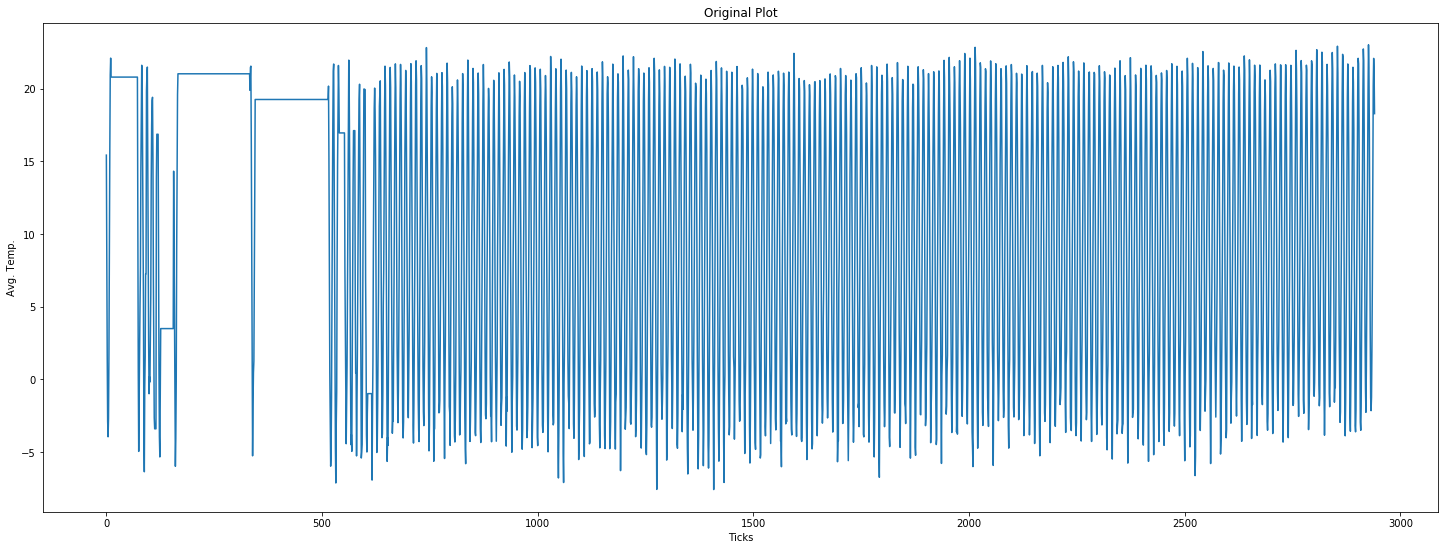

In [25]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
fig.set_size_inches(25, 9)
ax.set_xlabel('Ticks')
ax.set_ylabel('Avg. Temp.')
ax.set_title('Original Plot')
ax.plot('Ticks', 'AverageTemperature', data = usa);

## Stationarity Checking and Plotting rolling mean statistics

In [26]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    # Plot rolling statistics:
    plt.figure(figsize=(20,5))
    plt.plot(ts, color='green',label='Original');
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    
    plt.title('Rolling Mean')
    plt.show(block=False);
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
#     print("type of df_test: ",type(df_test))
#     print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

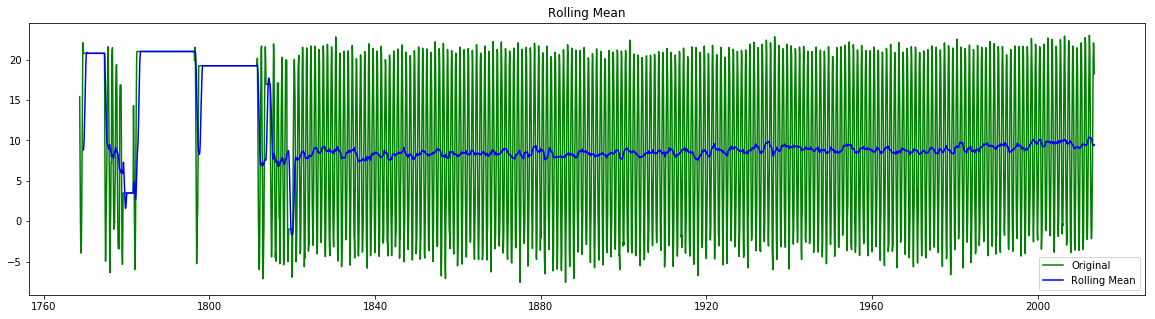

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic                   -4.028229
p-value                           0.001270
#Lags Used                       28.000000
Number of Observations Used    2912.000000
dtype: float64
Test Statistic                   -4.028229
p-value                           0.001270
#Lags Used                       28.000000
Number of Observations Used    2912.000000
Critical Value (1%)              -3.432598
Critical Value (5%)              -2.862533
Critical Value (10%)             -2.567299
dtype: float64


In [27]:
stationarity_check(usa.AverageTemperature)

The p-value is less than significant value(0.05) and t-statistic is also less than the 3 critical values. So, we say that the series is stationary. We do not need to perform any tasks to remove stationarity.

In [28]:
usa['Roll_Mean'] = usa['AverageTemperature'].rolling(window=12).mean()

In [29]:
usa.head(15)

,AverageTemperature,Ticks,Roll_Mean
Date,,,
1768-09-01,15.420,0,NaN
1768-10-01,8.162,1,NaN
1768-11-01,1.591,2,NaN
1768-12-01,-2.882,3,NaN
1769-01-01,-3.952,4,NaN
1769-02-01,-2.684,5,NaN
1769-03-01,1.828,6,NaN
1769-04-01,8.843,7,NaN
1769-05-01,15.724,8,NaN


## Moving towards analysis and predictions

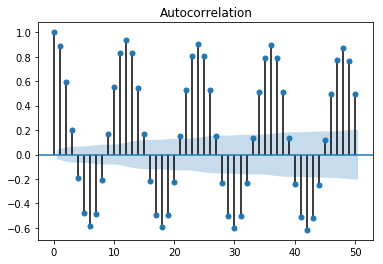

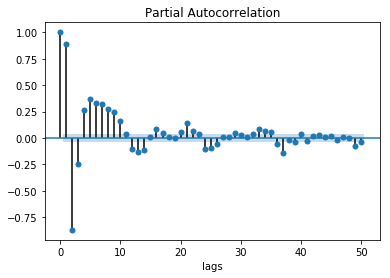

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(usa.AverageTemperature, lags=50)
plot_pacf(usa.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

From ACF and PACF plots, it's showing signs that the AR and MA parameters are in the range of 2 to 3. 
Let's try running ARMA analysis for varying range of AR and MA parameters.

In [31]:
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore')

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(usa.AverageTemperature,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:21420.819177628167
ARMA(0, 1) - AIC:18164.837481018854
ARMA(1, 0) - AIC:16933.17906879641
ARMA(1, 1) - AIC:15189.598979400907
ARMA(1, 2) - AIC:14185.927707336654
ARMA(1, 3) - AIC:13634.543356029873
ARMA(2, 0) - AIC:12792.996198102726
ARMA(2, 1) - AIC:12692.584571995645
ARMA(2, 2) - AIC:12284.801123408604
ARMA(2, 3) - AIC:12202.024485218275
ARMA(3, 0) - AIC:12613.486997325865
ARMA(3, 1) - AIC:12362.909874342136
ARMA(3, 2) - AIC:10822.639811161667
ARMA(3, 3) - AIC:10802.287751493222


The AIC being low for 3, 3 tell us that the perfect parameters are (AR, MA) = (3, 3). Since no integration was used, the d parameter is 0.

Fitting data MSE: 2.31


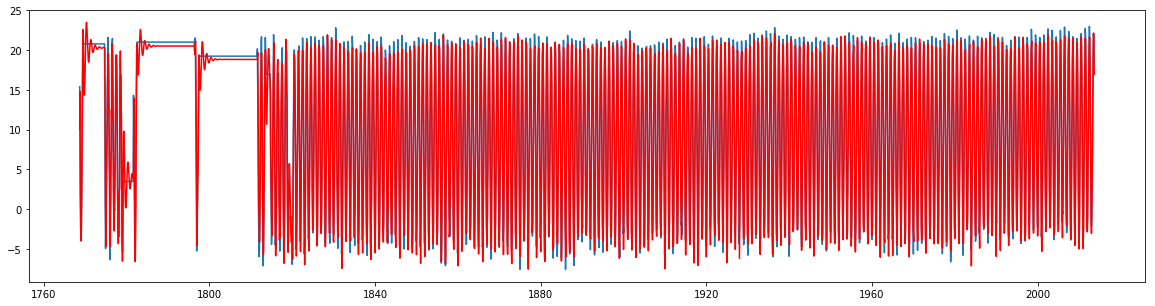

In [32]:
model = ARMA(usa.AverageTemperature, order=(3, 3))  
results_MA = model.fit()  
plt.figure(figsize=(20, 5))
plt.plot(usa.AverageTemperature);
plt.plot(results_MA.fittedvalues, color='red')
print('Fitting data MSE: %.2f'% (((results_MA.fittedvalues - usa.AverageTemperature)**2).mean()))
plt.show();

The graph as well as the MSE value above shows that the predictions are pretty good.

In [33]:
usa.tail()

,AverageTemperature,Ticks,Roll_Mean
Date,,,
2013-05-01,14.073,2936,9.428167
2013-06-01,20.198,2937,9.448500
2013-07-01,22.074,2938,9.370667
2013-08-01,21.168,2939,9.349500
2013-09-01,18.273,2940,9.452583


## Lets consider only the years post 2000, and predict values since 2000 to 2020!

In [34]:
predictions_after_2010 = results_MA.predict('01/01/2000', '12/01/2020')

In [35]:
predictions_after_2010

2000-01-01    -3.361640
2000-02-01    -1.275020
2000-03-01     5.975823
2000-04-01    11.102013
2000-05-01    14.907762
2000-06-01    19.411276
2000-07-01    21.072353
2000-08-01    20.321686
2000-09-01    17.289026
2000-10-01    10.959074
2000-11-01     4.331859
2000-12-01    -2.763009
2001-01-01    -5.302137
2001-02-01    -0.710356
2001-03-01     3.759144
2001-04-01     8.717375
2001-05-01    15.277396
2001-06-01    19.211674
2001-07-01    21.027077
2001-08-01    20.374015
2001-09-01    17.344990
2001-10-01    11.007425
2001-11-01     3.515691
2001-12-01     0.523832
2002-01-01    -2.817191
2002-02-01     0.136370
2002-03-01     4.090672
2002-04-01     8.098668
2002-05-01    15.183026
2002-06-01    18.586043
                ...    
2018-07-01    21.716041
2018-08-01    20.829548
2018-09-01    17.097408
2018-10-01    11.522455
2018-11-01     5.598780
2018-12-01     0.911072
2019-01-01    -1.289549
2019-02-01    -0.419672
2019-03-01     3.281529
2019-04-01     8.817798
2019-05-01    14

In [36]:
usa_after_2010 = usa.AverageTemperature['2000-01-01':]

In [37]:
usa_after_2010.tail()

Date
2013-05-01    14.073
2013-06-01    20.198
2013-07-01    22.074
2013-08-01    21.168
2013-09-01    18.273
Name: AverageTemperature, dtype: float64

## Plotting the values!!

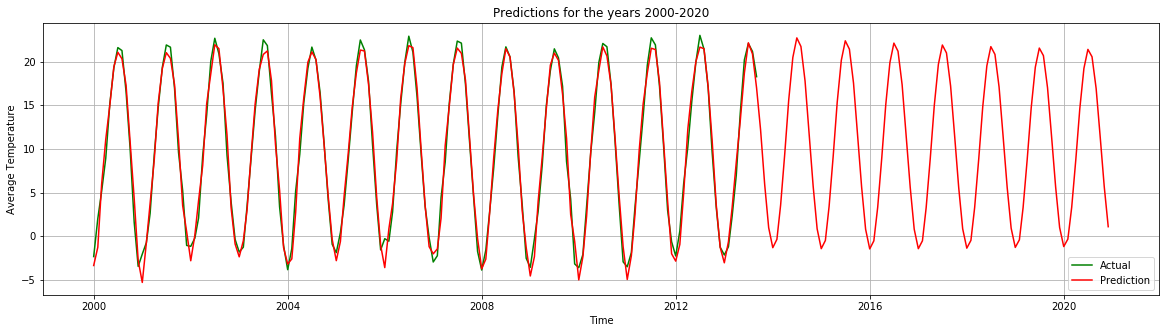

In [38]:
plt.figure(figsize=(20,5));
plt.plot(usa_after_2010, color = 'green', label = 'Actual');
plt.plot(predictions_after_2010, color = 'red', label = 'Prediction');
plt.legend();
plt.title('Predictions for the years 2000-2020');
plt.xlabel("Time");
plt.ylabel("Average Temperature");
plt.grid();
plt.show();

Very decent predictions till 2013 as well as from 2013 to 2020.

# Future Work: Adding seasonality to the analysis and using SARIMA modelling